# Project: Wrangling and Analyze Data

## Table of Contents: 
- [Introduction](#intro)
- [Data Gathering](#gather)
   - [Twitter Archive Data](#twitter-archive)
   - [Tweet Image Prediction](#image-prediction)
   - [Twitter API](#twitter-api)
- [Assessing Data](#assess)
   - [Quality issues](#quality)
   - [Tidiness issues](#tidiness)
- [Cleaning Data](#cleaning)
- [Storing Data](#storing_data)
- [Analyzing & Visualizing Data](#analyzing_data)

<a id='intro'></a>
## Introduction

The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering from other sources, then assessing and cleaning will be required for "Wow!"-worthy analyses and visualizations.

<a id='gather'></a>
## Data Gathering

In [1]:
#Importing all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
import requests
import os

<a id='twitter-archive'></a>
### Twitter Archive Data

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets

In [2]:
#importing the WeRateDogs Twitter archive data into the twitter_archive dataframe using the pandas package
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

<a id='image-prediction'></a>
### Tweet Image Prediction

A table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images). The table is hosted on the Udacity's servers

In [3]:
#Downloading the tweet image predictions programmatically using the requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
#Importing the image-predictions tsv file into the image_predictions dataframe using the pandas package
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

<a id='twitter-api'></a>
### Twitter API

Retweet count and favorite count are two of the notable column omissions in the Twitter achive. Fortunately, this additional data from Twitter's API by querying the API to gather this valuable data.

RESOURCE USED: https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [8]:
# For loop which will add each available tweet to a new line of tweet-json.txt
with open('tweet-json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

**A Twitter developer account couldn't be set up, so the data would be assessed using the 'tweet-json.txt' file provided. A pandas DataFrame would be created by creating an empty list, and populating it as it iterates through the .txt file line by line, and then converted it to a pandas DataFrame once all of the data has been gathered.**

In [9]:
#Creating an empty list
tweet_json = []

In [10]:
#For loop which will iterate through 'tweet-json.txt' line by line and populate the empty tweet_json list
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    tweet_json.append({
        'tweet_id':twitter_data['id'],
        'retweet_count':twitter_data['retweet_count'],
        'favorite_count':twitter_data['favorite_count']
    })

In [11]:
#Converting the tweet_json list of dictionaries into a pandas dataframe using pandas packages
twitter_data = pd.DataFrame(tweet_json, columns=['tweet_id', 'retweet_count', 'favorite_count'])

<a id='assess'></a>
## Assessing Data

### Visual Assessment

**Visual assessment involves systematically looking through each table of data in a Jupyter notebook or scrolling through the data looking for interesting and relevant issues\
Each piece of gathered data would be displayed in the Jupyter Notebook for visual assessment purposes**

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
twitter_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatic Assessment

#### twitter_archive Dataset Assessement

In [15]:
twitter_archive.head() #displays first 5 row of the dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
twitter_archive.info() #gets a concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe() #gets statistical summaries of numeric variables

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [18]:
twitter_archive['rating_numerator'].value_counts() #returns the counts of unique values in the column

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [19]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
twitter_archive.isnull().sum() #checks for null values in the dataset

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
twitter_archive.duplicated().sum() #identifies duplicate rows in the dataset

0

In [22]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [24]:
twitter_archive['name'].unique() #returns the count of unique values in the column

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [25]:
twitter_archive['text'].unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

#### image_predictions Dataset Assessement

In [26]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [29]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [30]:
image_predictions.duplicated().sum()

0

#### twitter_data Dataset Assessment

In [31]:
twitter_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [32]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [33]:
twitter_data.duplicated().sum()

0

<a id='quality'></a>
### Quality issues

#### twitter_archive Dataset:
1. Rows with 'retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id & in_reply_to_user_id' are retweets and not original ratings

2. Dataset includes columns not needed for the analysis('in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp')

3. Erroneous datatypes(tweet_id, timestamp, source)

4. Some rows in the 'rating_denominator' column are not equal to 10

5. The string in the 'source' column is written in HTML format

6. Rows in the 'text' column end with short links

7. 'text' column includes ratings again, and some do not correspond to the 'rating_numerator' and 'rating_denominator' columns

8. Null values in the 'expanded_urls' column

9. Some urls in the 'expanded_urls' column are written multiple times in the same row

10. Incorrect dog names e.g 'a', 'not', 'an', 'very', 'the', etc

#### image_predictions Dataset:
11. Erroneous datatype(tweet_id)

#### twitter_data Dataset:
12. Erroneous datatype(tweet_id)

<a id='tidiness'></a>
### Tidiness issues

#### twitter_archive Dataset

1. 4 different columns for the 4 dog stages(doggo, floofer, pupper and puppo)

#### image_predictions Dataset

2. Multiple columns for image predictions and confidence interval

3. Columns should be part of twitter_archive dataset

#### twitter_data Dataset

4. Columns should be part of twitter_archive dataset

<a id='cleaning'></a>
## Cleaning Data

In [34]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_data_clean = twitter_data.copy()

### Quality Issues:

### twitter_archive_clean

### Issue #1:

#### Define: Keep only original ratings and no retweets

#### Code

**Tweets with retweeted_status_id and in_reply_to_user_id are retweets and not original ratings**

In [35]:
#Selecting only rows in the dataset where 'retweeted_status_id & in_reply_to_user_id' is null
twitter_archive_clean= twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean= twitter_archive_clean[twitter_archive_clean['in_reply_to_user_id'].isnull()]

#### Test

In [36]:
twitter_archive_clean['retweeted_status_id'].unique()

array([nan])

In [37]:
twitter_archive_clean['in_reply_to_user_id'].unique()

array([nan])

### Issue #2:

#### Define: Drop the columns that are not needed

#### Code

In [38]:
#Using the .drop pandas method to drop columns that are not needed for analysis
twitter_archive_clean = twitter_archive_clean.drop(labels=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [39]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3:

#### Define: Convert 'tweet_id', 'timestamp', 'source', 'rating_numerator', 'rating_denominator' columns to correct datatype

#### Code

In [40]:
#Using the .astype method to convert the columns to the correct datatypes
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype('float')

#### Test

In [41]:
twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #4:

#### Define: Drop rows where rating_denominator is not equal to 10

#### Code

In [42]:
#Selecting only rows in the dataset where the denominator is equal to 10
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 10]

#### Test

In [43]:
twitter_archive_clean['rating_denominator'].unique()

array([10.])

### Issue #5:

#### Define: Convert string in source column from HTML-format to normal format

#### Code

In [44]:
#Using the .str.extract pandas method to remove specified regex expressions from the 'source' column
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [45]:
twitter_archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [46]:
#Converting the 'source' column back to category
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

In [47]:
twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #6:

#### Define: Remove links from the end of texts

#### Code

In [48]:
#Defining a function 'link', that finds 'https' in each row of the 'text' column. If found, it returns all preceeding text up until the 'https', and if not found, it returns the exact same text
def link(x):
    url = x.find('https')
    if url == -1:
        x = x
    else:
        x = x[:url-1]
    return x

#Applying the link function on the dataset
twitter_archive_clean['text'] = twitter_archive_clean['text'].apply(link)

#### Test

In [49]:
twitter_archive_clean['text'].unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet'],
      dtype=object)

### Issue #7:

#### Define: Correct the incorrectly extracted 'rating_numerator' column and removing ratings from the 'text' column

#### Code

In [50]:
#Using the .str.extract pandas method to extract specified regex expressions from the 'text' column, which will give the ratings in a new column, 'text_rating'
twitter_archive_clean['text_rating'] = twitter_archive_clean['text'].str.extract(r"(\d+\.?\d*\/\d+)")

In [51]:
twitter_archive_clean['text_rating']

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Name: text_rating, Length: 2080, dtype: object

In [52]:
#Using the .str.split pandas method to split the 'text_rating' column in a new variable, rating
rating = twitter_archive_clean['text_rating'].str.split("/", n = 1, expand = True)
rating

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [53]:
#Indexing rating to get 2 new columns, 't_rating_num' and 't_rating_den', each representing the rating numerators and denominators respectively 
twitter_archive_clean['t_rating_num'] = rating[0]
twitter_archive_clean['t_rating_den'] = rating[1]

In [54]:
#Converting the column to the appropriate float datatype
twitter_archive_clean['t_rating_num'] = twitter_archive_clean['t_rating_num'].astype('float')

In [55]:
#Converting the column to the appropriate float datatype
twitter_archive_clean['t_rating_den'] = twitter_archive_clean['t_rating_den'].astype('float')

In [56]:
#Checking to see if there are rows where the text extracted rating numerators is different from the dataset provided numerators
twitter_archive_clean['t_rating_num'].equals(twitter_archive_clean['rating_numerator'])

False

In [57]:
#Checking to see if there are rows where the text extracted rating denominators is different from the dataset provided denominators
twitter_archive_clean['t_rating_den'].equals(twitter_archive_clean['rating_denominator'])

True

In [58]:
#Selecting rows where the text extracted numerators is not equal to the dataset provided numerators
twitter_archive_clean.loc[~(twitter_archive_clean['t_rating_num'] == twitter_archive_clean['rating_numerator'])]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_rating,t_rating_num,t_rating_den
45,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,None,None,None,None,13.5/10,13.50,10.0
695,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None,9.75/10,9.75,10.0
763,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,None,None,pupper,None,11.27/10,11.27,10.0
1712,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,None,None,None,None,11.26/10,11.26,10.0


In [59]:
#Updating the dataset provided numerators of the selected rows
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '883482846933004288'), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '786709082849828864'), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '778027034220126208'), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '681340665377193984'), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '680494726643068929'), 'rating_numerator'] = 11.26

In [60]:
#Removing the ratings in the 'text' column
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('\s*(\d+\.?\d*\/\d+)\s*', '', n=1)

C:\Users\yusir\AppData\Local\Temp\ipykernel_2364\906324870.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('\s*(\d+\.?\d*\/\d+)\s*', '', n=1)


#### Test

In [61]:
twitter_archive_clean['t_rating_num'].equals(twitter_archive_clean['rating_numerator'])

True

In [62]:
twitter_archive_clean['text'].unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue.would cuddle af',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here.would walk the shit out of',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair.would pet'],
      dtype=object)

In [63]:
#dropping extra columns created during the cleaning
twitter_archive_clean = twitter_archive_clean.drop(['text_rating', 't_rating_num', 't_rating_den'], axis=1)

In [64]:
#testing to check the twitter_archive_clean columns
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #8:

#### Define: Remove rows with null 'expanded_urls'

#### Code

In [65]:
#Removing rows where the 'expanded_urls' column is null
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [66]:
twitter_archive_clean['expanded_urls'].isnull().sum()

0

### Issue 9:

#### Define: Remove duplicated urls in individual rows in the 'expanded_urls' column

#### Code

In [67]:
twitter_archive_clean['expanded_urls'].value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                      2
https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/684481074559381504/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/683834909291606017/video/1                                                                                                                                    1
https://twitter.com/dog_rates/status/683849932751646720/photo/1                                                                                                                                    1
               

In [68]:
#Selecting the rows in the twitter_archive_clean dataset where the 'expanded_urls' column has more than 1 url in each row
multiple_urls = twitter_archive_clean[twitter_archive_clean['expanded_urls'].str.contains(r"(\w*,\w*)")]

C:\Users\yusir\AppData\Local\Temp\ipykernel_2364\1496832422.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  multiple_urls = twitter_archive_clean[twitter_archive_clean['expanded_urls'].str.contains(r"(\w*,\w*)")]


In [69]:
multiple_urls['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/742528092657332225/photo/1,https://twitter.com/dog_rates/status/742528092657332225/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/735635087207878657/photo/1,https://twitter.com/dog_rates/status/735635087207878657/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/735991953473572864/photo/1,https://twitter.com/dog_rates/status/735991953473572864/photo/1,https://twitter.com/dog_rates/status/735991953473572864/photo/1                          

In [70]:
#Splitting the selected rows into seperate urls
urls = multiple_urls['expanded_urls'].str.split(",", n = 1, expand = True)

In [71]:
#Selecting the first url provided as the only 'expanded_url' in each row
twitter_archive_clean['expanded_urls'].loc[multiple_urls.index] = urls[0]

#### Test

In [72]:
twitter_archive_clean['expanded_urls'].value_counts()

https://vine.co/v/ea0OwvPTx9l                                      2
https://twitter.com/dog_rates/status/892420643555336193/photo/1    1
https://twitter.com/dog_rates/status/684481074559381504/photo/1    1
https://twitter.com/dog_rates/status/683834909291606017/video/1    1
https://twitter.com/dog_rates/status/683849932751646720/photo/1    1
                                                                  ..
https://twitter.com/dog_rates/status/759447681597108224/photo/1    1
https://twitter.com/dog_rates/status/759557299618865152/photo/1    1
https://twitter.com/dog_rates/status/759793422261743616/photo/1    1
https://twitter.com/dog_rates/status/759846353224826880/photo/1    1
https://twitter.com/dog_rates/status/666020888022790149/photo/1    1
Name: expanded_urls, Length: 2076, dtype: int64

### Issue #10:

#### Define: Change dog names that are not proper nouns to None

#### Code

In [73]:
#Updating dog names that are not proper nouns(i.e does not start with a capital letter) to None
twitter_archive_clean['name'][twitter_archive_clean['name'].str.match('[a-z]+')] = 'None'

#### Test

In [74]:
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [75]:
twitter_archive_clean['name'].value_counts()

None          690
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Glenn           1
Shelby          1
Sephie          1
Bonaparte       1
Christoper      1
Name: name, Length: 928, dtype: int64

### image_predictions_clean

### Issue #11:

#### Define: Convert 'tweet_id' to correct datatype

#### Code

In [76]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [77]:
image_predictions_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### twitter_data_clean

### Issue #12:

#### Define: Convert 'tweet_id' to correct datatype

#### Code

In [78]:
twitter_data_clean['tweet_id'] = twitter_data_clean['tweet_id'].astype(str)

#### Test

In [79]:
twitter_data_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

### Tidiness Issues:

### twitter_archive_clean

### Issue #1:

#### Define: Combine doggo, floofer, pupper and puppo dog stages into a single column

#### Code

**.melt pandas function to combine multiple rows into 1 will not work in this case. It will lead to creation of duplicate rows**

In [80]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [81]:
#Adding all the 4 different dog stages column into a new column, 'all_dogs'
twitter_archive_clean['all_dogs'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

In [82]:
twitter_archive_clean['all_dogs'].value_counts()

NoneNoneNoneNone        1742
NoneNonepupperNone       220
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: all_dogs, dtype: int64

In [83]:
#Defining a function called stages that counts the dog stages in each row of the 'all_dogs' column, and returns the correct dog stage based on the count
def stages(dog):
    if dog['all_dogs'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if dog['all_dogs'].count('doggo') == 1:
            return 'Doggo'
        elif dog['all_dogs'].count('floofer') == 1:
            return 'Floofer'
        elif dog['all_dogs'].count('pupper') == 1:
            return 'Pupper'
        elif dog['all_dogs'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'
        
#Applying the stages function to the twitter_archive_clean dataset to create a new column, 'stage'
twitter_archive_clean['stage'] = twitter_archive_clean.apply(stages, axis=1)

In [84]:
#Converting the 'stage' column to the appropriate category datatype
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].astype('category')

In [85]:
#Dropping columns no longer needed for the analysis
twitter_archive_clean = twitter_archive_clean.drop(['all_dogs', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [86]:
twitter_archive_clean['stage'].value_counts()

None        1742
Pupper       220
Doggo         72
Puppo         23
Multiple      11
Floofer        9
Name: stage, dtype: int64

In [87]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   object             
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   category           
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   float64            
 6   rating_denominator  2077 non-null   float64            
 7   name                2077 non-null   object             
 8   stage               2077 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 198.8+ KB


### image_predictions Dataset

### Issue #2:

#### Define: Keep a single column for image predictions and confidence interval and delete the rest

#### Code

In [88]:
#Creating 2 empty lists
image_prediction = []
confidence_interval = []

# Defining a funtion, image, that checks if the first prediction of the image is true. If it is, it populates the empty list with the true image prediction and it's confidence interval. If it isn't, it does the same for the second and third predictions
def image(image_predictions_clean):
    if image_predictions_clean['p1_dog'] == True:
        image_prediction.append(image_predictions_clean['p1'])
        confidence_interval.append(image_predictions_clean['p1_conf'])
    elif image_predictions_clean['p2_dog'] == True:
        image_prediction.append(image_predictions_clean['p2'])
        confidence_interval.append(image_predictions_clean['p2_conf'])
    elif image_predictions_clean['p3_dog'] == True:
        image_prediction.append(image_predictions_clean['p3'])
        confidence_interval.append(image_predictions_clean['p3_conf'])
    else:
        image_prediction.append('Error') #none of the 3 image predictions are true
        confidence_interval.append('Error')
 
    
#Applyiing the image function to the image_predictions dataset
image_predictions_clean.apply(image, axis=1)

#Creating new columns in the image_predictions_dataset using the populated lists created
image_predictions_clean['image_prediction'] = image_prediction
image_predictions_clean['confidence_interval'] = confidence_interval

In [89]:
#Dropping columns no longer needed for the analysis
image_predictions_clean = image_predictions_clean.drop(['img_num', 'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)

In [90]:
#Dropping rows where the image function returned 'Error'
image_predictions_clean = image_predictions_clean[image_predictions_clean['image_prediction'] != 'Error']

In [91]:
#Converting the 'confidence_interval' column to the right datatype
image_predictions_clean['confidence_interval'] = image_predictions_clean['confidence_interval'].astype(float)

#### Test

In [92]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'image_prediction', 'confidence_interval'], dtype='object')

In [93]:
image_predictions_clean.dtypes

tweet_id                object
jpg_url                 object
image_prediction        object
confidence_interval    float64
dtype: object

### Issue #3:

#### Define: Merge the image_predictions_clean table to the twitter_archive_clean table

#### Code

In [94]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, how='left', on='tweet_id')

#### Test

In [95]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2077 non-null   object             
 1   timestamp            2077 non-null   datetime64[ns, UTC]
 2   source               2077 non-null   category           
 3   text                 2077 non-null   object             
 4   expanded_urls        2077 non-null   object             
 5   rating_numerator     2077 non-null   float64            
 6   rating_denominator   2077 non-null   float64            
 7   name                 2077 non-null   object             
 8   stage                2077 non-null   category           
 9   jpg_url              1650 non-null   object             
 10  image_prediction     1650 non-null   object             
 11  confidence_interval  1650 non-null   float64            
dtypes: category(2), date

### twitter_data_clean

### Issue #4:

#### Define: Merge the twitter_data_clean table to the twitter_archive_clean table

#### Code

In [96]:
twitter_archive_clean = twitter_archive_clean.merge(twitter_data_clean, how='left', on='tweet_id')

#### Test

In [97]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2077 non-null   object             
 1   timestamp            2077 non-null   datetime64[ns, UTC]
 2   source               2077 non-null   category           
 3   text                 2077 non-null   object             
 4   expanded_urls        2077 non-null   object             
 5   rating_numerator     2077 non-null   float64            
 6   rating_denominator   2077 non-null   float64            
 7   name                 2077 non-null   object             
 8   stage                2077 non-null   category           
 9   jpg_url              1650 non-null   object             
 10  image_prediction     1650 non-null   object             
 11  confidence_interval  1650 non-null   float64            
 12  retweet_count       

In [98]:
#Droppimg rows with null values in the dataset
twitter_archive_clean = twitter_archive_clean.dropna()

In [99]:
twitter_archive_clean.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls          0
rating_numerator       0
rating_denominator     0
name                   0
stage                  0
jpg_url                0
image_prediction       0
confidence_interval    0
retweet_count          0
favorite_count         0
dtype: int64

<a id='storing_data'></a>
## Storing Data

In [100]:
#Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv"
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analyzing_data'></a>
## Analyzing and Visualizing Data

In [101]:
#Loading the saved "twitter_archive_master.csv" dataset using the .read_csv pandas function, into the twitter_archive_master dataframe
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [102]:
twitter_archive_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,image_prediction,confidence_interval,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908


In [103]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             1650 non-null   int64  
 1   timestamp            1650 non-null   object 
 2   source               1650 non-null   object 
 3   text                 1650 non-null   object 
 4   expanded_urls        1650 non-null   object 
 5   rating_numerator     1650 non-null   float64
 6   rating_denominator   1650 non-null   float64
 7   name                 1650 non-null   object 
 8   stage                1650 non-null   object 
 9   jpg_url              1650 non-null   object 
 10  image_prediction     1650 non-null   object 
 11  confidence_interval  1650 non-null   float64
 12  retweet_count        1650 non-null   int64  
 13  favorite_count       1650 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 180.6+ KB


In [104]:
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype(str)
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])
twitter_archive_master[['source', 'stage']] = twitter_archive_master[['source', 'stage']].astype('category')

### Insight 1:
**The most popular dog stage is Puppo with the highest favorite count and second highest retweet count**

In [105]:
popular_dog_stage = twitter_archive_master.groupby('stage', as_index=False)[['favorite_count', 'retweet_count']].mean().sort_values(['favorite_count', 'retweet_count'], ascending = False)
popular_dog_stage 

,stage,favorite_count,retweet_count
5,Puppo,21457.809524,6375.761905
0,Doggo,19404.240741,7059.870370
2,Multiple,18004.111111,6138.444444
1,Floofer,13206.000000,4968.714286
3,None,8871.239052,2633.699210
4,Pupper,7584.584337,2440.469880


### Visualization 1:

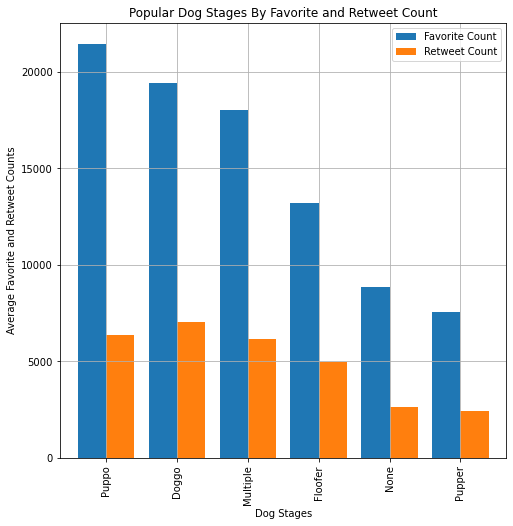

In [106]:
popular_dog_stage.plot(x='stage', y=['favorite_count', 'retweet_count'], kind='bar', grid=True, width=0.8, figsize=(8,8))
plt.title('Popular Dog Stages By Favorite and Retweet Count')
plt.xlabel('Dog Stages')
plt.ylabel('Average Favorite and Retweet Counts')
plt.legend(['Favorite Count', 'Retweet Count']);

### Insight 2:
**The most common sources of original tweets in the dataset is the 'Twitter for iPhone' source**

In [107]:
tweet_source = twitter_archive_master['source'].value_counts()
tweet_source

Twitter for iPhone    1619
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

### Visualization 2:

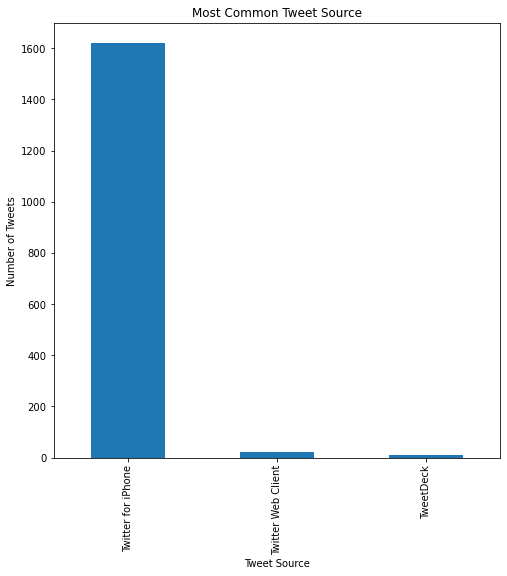

In [108]:
tweet_source.plot(kind='bar', figsize=(8,8))
plt.title('Most Common Tweet Source')
plt.xlabel('Tweet Source')
plt.ylabel('Number of Tweets');

### Insight 3:
**The Bouvier des Flandres dog had the highest average rating in the dataset**

In [109]:
dog_rating = twitter_archive_master.groupby('image_prediction', as_index=False)['rating_numerator'].mean().sort_values('rating_numerator', ascending = False).head(10)
dog_rating

,image_prediction,rating_numerator
11,Bouvier_des_Flandres,13.000000
54,Saluki,12.500000
78,briard,12.333333
63,Tibetan_mastiff,12.250000
9,Border_terrier,12.142857
107,standard_schnauzer,12.000000
104,silky_terrier,12.000000
31,Irish_setter,11.750000
26,Gordon_setter,11.750000
55,Samoyed,11.690476


### Visualization 3:

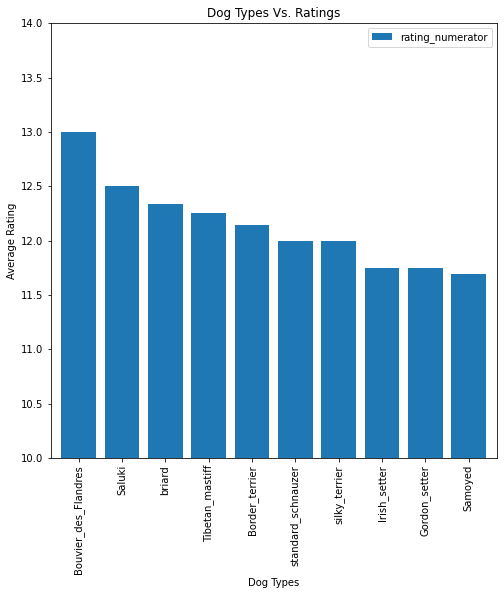

In [110]:
dog_rating.plot(x='image_prediction', y='rating_numerator', kind='bar', width=0.8, figsize=(8,8))
plt.title('Dog Types Vs. Ratings')
plt.xlabel('Dog Types')
plt.ylabel('Average Rating')
plt.ylim([10, 14]);

### Insight 4:
**The number of twitter engagements with the dog tweets increased with time, with more obvious increase in the favourite count than the retweet count**

In [111]:
trends_with_time = twitter_archive_master.groupby('timestamp', as_index=False)[['favorite_count', 'retweet_count']].mean()
trends_with_time

,timestamp,favorite_count,retweet_count
0,2015-11-15 22:32:08+00:00,2535.0,532.0
1,2015-11-15 23:05:30+00:00,132.0,48.0
2,2015-11-15 23:21:54+00:00,128.0,47.0
3,2015-11-16 00:04:52+00:00,311.0,147.0
4,2015-11-16 00:24:50+00:00,111.0,41.0
...,...,...,...
1645,2017-07-29 00:08:17+00:00,20562.0,3261.0
1646,2017-07-29 16:00:24+00:00,41048.0,9774.0
1647,2017-07-30 15:58:51+00:00,42908.0,8964.0
1648,2017-07-31 00:18:03+00:00,25461.0,4328.0


### Visualization 4

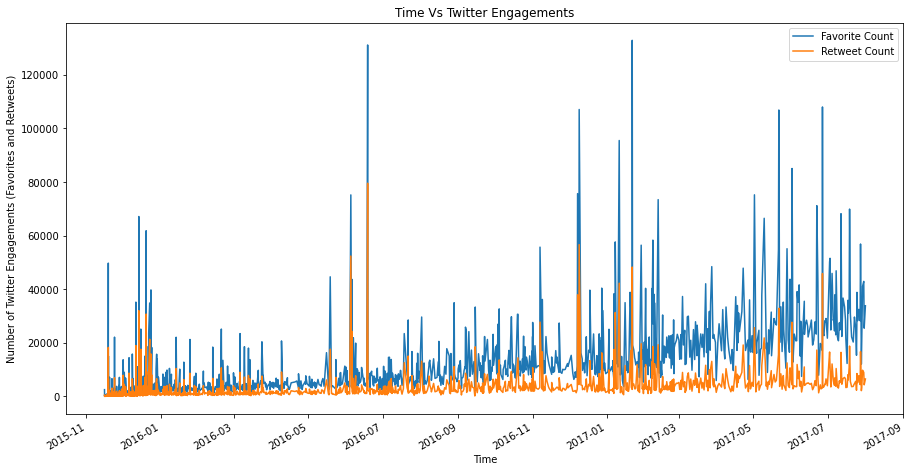

In [112]:
trends_with_time.plot(x='timestamp', y=['favorite_count','retweet_count'], kind='line', figsize=(15,8))
plt.title('Time Vs Twitter Engagements')
plt.xlabel('Time')
plt.ylabel('Number of Twitter Engagements (Favorites and Retweets)')
plt.legend(['Favorite Count', 'Retweet Count']);

### Insight 5:
**The dogs with the highest number of engagements(favorite and retweet counts) have the highest number of ratings**

In [113]:
ratings_and_engagements = twitter_archive_master[['rating_numerator', 'favorite_count', 'retweet_count']].sort_values(['favorite_count', 'retweet_count'], ascending=False)
ratings_and_engagements

,rating_numerator,favorite_count,retweet_count
275,13.0,132810,48265
683,13.0,131075,79515
53,13.0,107956,45849
358,13.0,107015,56625
100,13.0,106827,32883
...,...,...,...
1641,8.0,115,61
1627,7.0,113,44
1645,5.0,111,41
1620,9.0,107,23


### Visualization 5

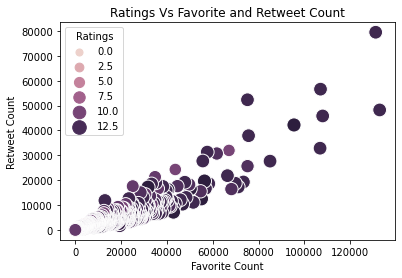

In [114]:
sns.scatterplot(x='favorite_count', y='retweet_count', data=ratings_and_engagements, hue='rating_numerator', size='rating_numerator', sizes=(50,200));
plt.title('Ratings Vs Favorite and Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.legend(title='Ratings');